# Obspyとの連携

ObsPyは地震学で広く使われているパッケージです．様々な機能がありますが，広範な種類の波形フォーマットに対応しているため，自作のプログラムでも波形の読み書き部分だけはObsPyで，といった使い方ができます．ここではこの機能を使って地震波形ファイルを読み込み，それをPyGMTで描画してみます．

In [1]:
import pygmt
import obspy
from obspy import UTCDateTime


SAC (Seismic Analysis Code) に含まれている地震波形例をファイルとして保存し，それをObsPyから読み込んでみ ましょう．SACでは以下のようなコマンドを実行することでサンプルファイルを作ります．

```bash
$ sac
 SEISMIC ANALYSIS CODE [10/13/2020 (Version 101.6a)]
 Copyright 1995 Regents of the University of California

SAC> funcgen seismogram
SAC> w dat/example.sac
SAC> quit
```

ObsPy で読み込むには `obspy.core.read` を使います．このコマンドは任意個数の地震波形を stream 形式という専用の型のリストに読み込みます．今回読み込むのは1波形だけなので，その最初の成分を `trace0` として抽出しましょう．

In [2]:
trace = obspy.core.read('./dat/example.sac')
trace0 = trace[0]

ObsPyは内部でmatplotlibと連携していて，波形に付随するメソッドの `plot` を使うだけで，波形を適当にプロットしてくれます．

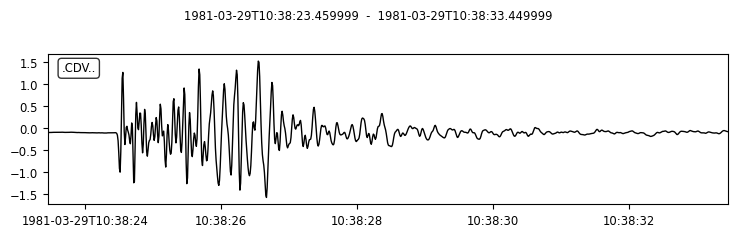

In [3]:
p = trace0.plot()

ObsPyで読み込んだ波形には，

- 波形振幅データ `trace0.data`
- 波形時刻情報 `trace0.times()`
- その他ヘッダ情報 `trace0.stats`

といった情報が含まれます．ObsPyは様々な波形データ形式に対応するなかで，今回はSAC形式の波形を読み込んでいるので，`trace0.stats.sac`という辞書に，SAC形式のヘッダが格納されています．

では，これを PyGMT で同じようにプロットしてみましょう．

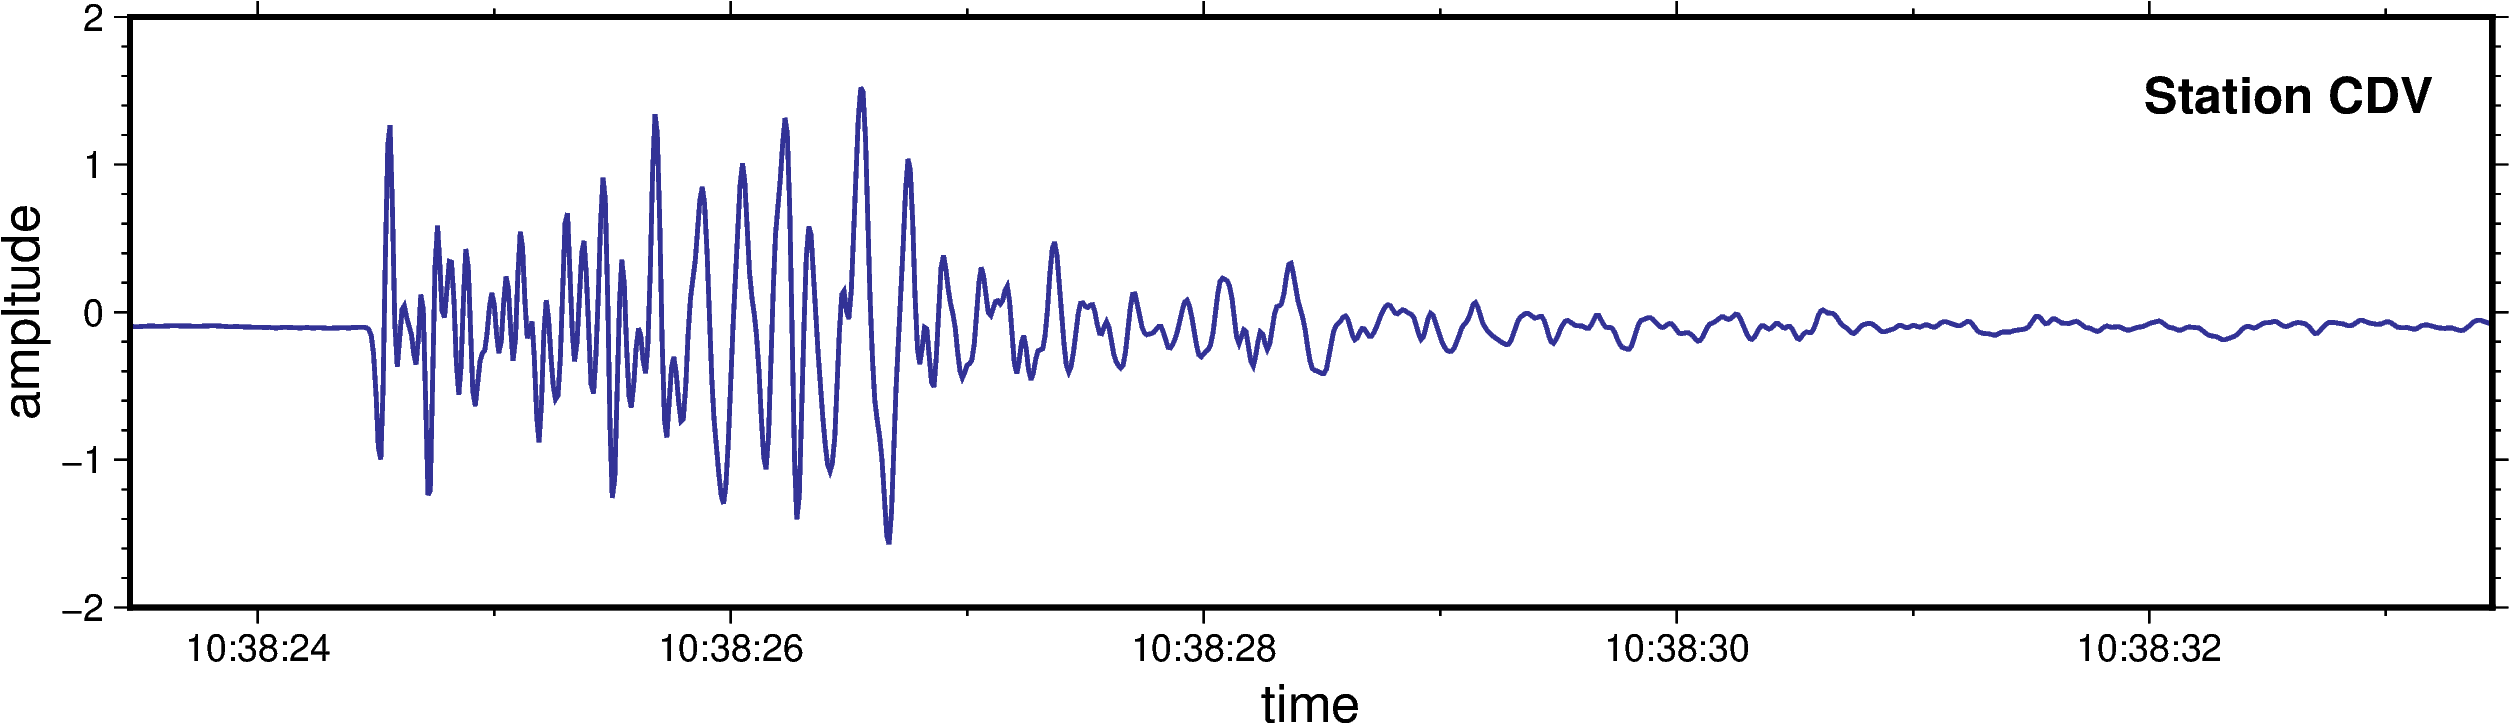

In [4]:
fig = pygmt.Figure()

fig.plot(
    projection = 'X20c/5c',
    region = [trace0.stats.starttime, trace0.stats.endtime, -2, 2],
    x = trace0.times("timestamp"), 
    y = trace0.data,
    pen = 'thick,50/50/150'
)

fig.text(
    text = "Station " + trace0.stats.station, 
    position = 'RT', 
    offset = 'j0.5c/0.5c',
    font = '12p,Helvetica-Bold,Black'
)

fig.basemap(
    frame  = ['WSen', 'xaf+l"time"', 'yaf+l"ampltude"' ],
)

fig.show()

基本的にこれまでに出てきたコマンドの組み合わせで実現できます．

特記すべきは`region` の横軸で，ObsPyのヘッダ（`stats`）に含まれる開始時間 `starttime` と 終了時間 `endtime` がそのまま `pygmt` の範囲指定に使えるのです．また，`fig.plot` に与える x軸データも，ObsPyの波形の時間情報 `trace0.times()` をそのまま与えることができます．

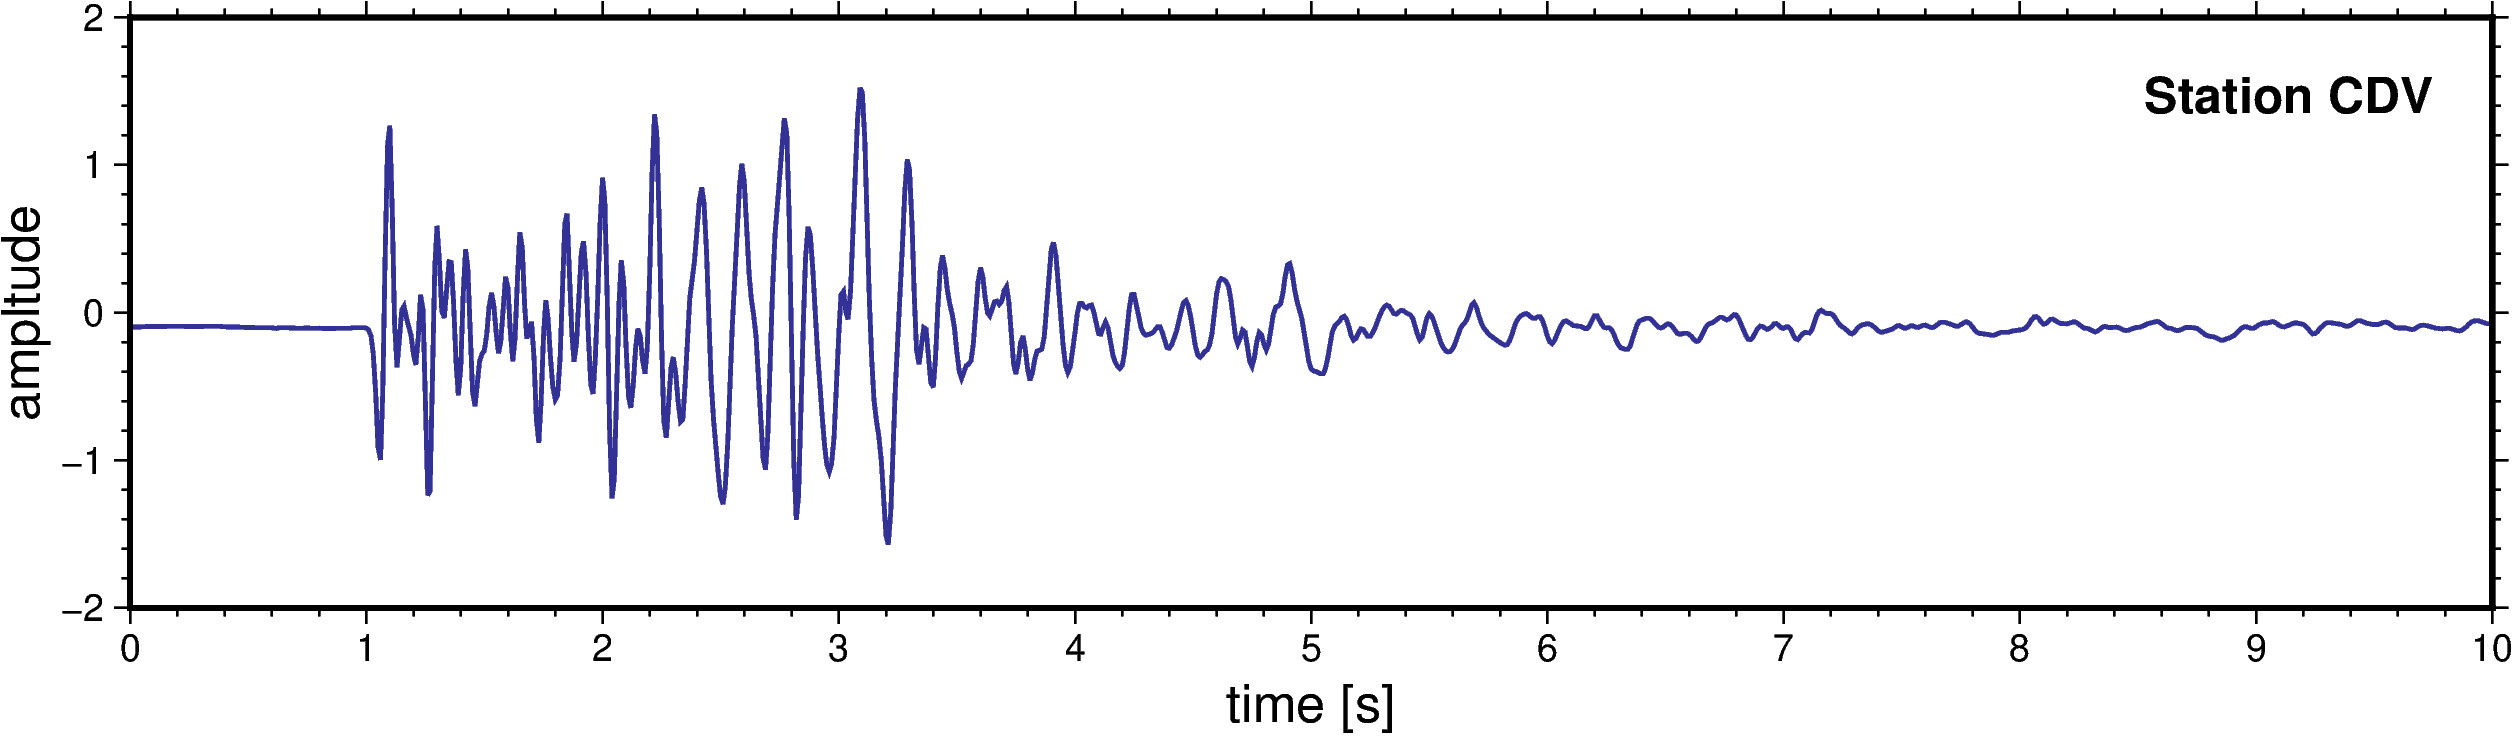

In [5]:
fig = pygmt.Figure()

fig.plot(
    projection = 'X20c/5c',
    region = [0, trace0.stats.delta * trace0.stats.npts, -2, 2],
    x = trace0.times(), 
    y = trace0.data,
    pen = 'thick,50/50/150'
)

fig.text(
    text = "Station " + trace0.stats.station, 
    position = 'RT', 
    offset = 'j0.5c/0.5c',
    font = '12p,Helvetica-Bold,Black'
)

fig.basemap(
    frame  = ['WSen', 'xaf+l"time [s]"', 'yaf+l"ampltude"' ],
)

fig.show()